# **Resolvendo o desafio "Titanic Machine Learning from Disaster" do Kaggle**

## Do que se trata este desafio?

#### O desafio "Titanic: Machine Learning from disaster" é um dos desafios mais populares do Kaggle, onde tem como objetivo a construção de um modelo preditivo que conseguir acertar com o maior precisão possível quais passageiros sobreviveram ou não ao famoso naufrágio!

# Primeiramente vamos carregar, vizualizar e limpar os dados, para que possíveis Inconsistências não nos atrapalhem futuramente

In [5]:
# limpeza de dados e exploração de dados
import pandas as pd

# vizualização de dados 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# carregando dados 
treino = pd.read_csv(r"C:\Users\renil\Desktop\TitanicKeagle\train.csv")
teste = pd.read_csv(r"C:\Users\renil\Desktop\TitanicKeagle\test.csv")

In [7]:
# visualizando as 5 primeiras linhas 
treino.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# gerando resumo estatístico
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Limpeza de dados

In [10]:
# procurando por duplicatas 
treino.duplicated().sum()

0

In [11]:
# procurando por dados nulos 
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# prenchendo idades faltantes com a média 
valor_mais_frequente = treino['Embarked'].mode()[0]  # Obter a moda
treino['Embarked'] = treino['Embarked'].fillna(valor_mais_frequente)  # Substituir valores NaN

In [13]:
# substituindo dados faltantes
treino['Cabin'] = treino['Cabin'].fillna('Unknown')

# substituindo valores faltantes em "Embarked" pela moda 
treino['Embarked'] = treino['Embarked'].fillna(treino['Embarked'].mode()[0])

In [14]:
# vamos verificar se os dados foram tratados corretamente
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

# Agora que os dados foram devidamente tratados, vamos a uma breve análise de dados para obter alguns insights valiosos para o nosso futuro modelo.

Quantidade de passageiros por sexo
Sex
male      577
female    314
Name: count, dtype: int64


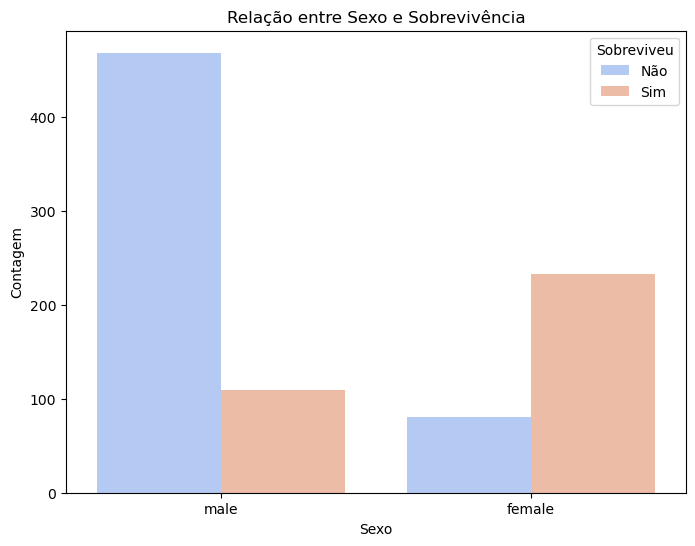

In [16]:
# exibir total de passageiros por sexo
contagem_Sexo = treino['Sex'].value_counts()
print("Quantidade de passageiros por sexo")
print(contagem_Sexo)

# criando e configurando gráfico
plt.figure(figsize= (8, 6))
sns.countplot(data= treino, x= 'Sex', hue= 'Survived', palette= 'coolwarm')

plt.title("Relação entre Sexo e Sobrevivência")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.legend(title= 'Sobreviveu', labels=["Não", "Sim"])

plt.show()

como podemos observar, as mulheres tiveram uma taixa maior de sobrevivência em relação aos homens.

## Agora vamos fazer a mesma coisa, porém utlizando a coluna "Age" que reprensenta a idade dos passageiros, o que exigirá uma lógica um pouco mais complexa

Quantidade de passageiros por faixa etária
Faixa_etaria
Adulto                 549
crianca/adolescente    113
idoso                   26
Name: count, dtype: int64


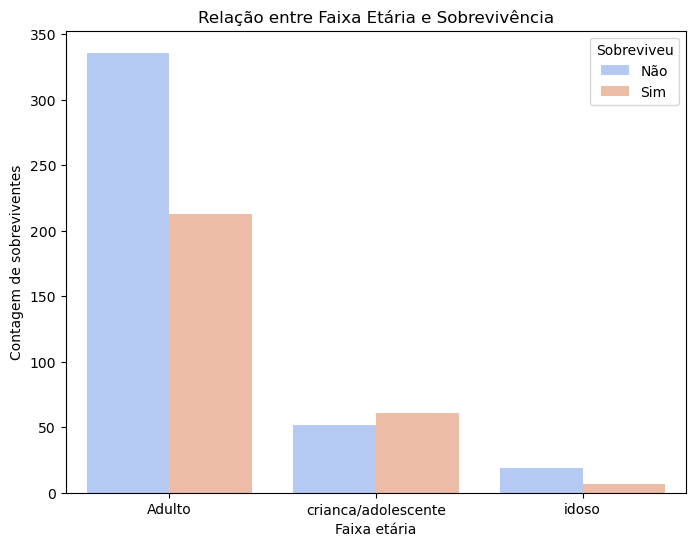

In [19]:
# agrupando as idades em faixas etárias
def definir_faixa_etaria(idade):
    if 0 < idade < 18:
        return "crianca/adolescente"
    elif 18 < idade < 60:
        return "Adulto"
    elif idade >= 60:
        return "idoso"

treino['Faixa_etaria'] = treino['Age'].apply(definir_faixa_etaria)
contagem_faixa_etaria = treino['Faixa_etaria'].value_counts()
sobrevivencia_por_faixa = treino.groupby('Faixa_etaria')['Survived'].value_counts()

# criando e configurando gráfico
plt.figure(figsize= (8, 6))
sns.countplot(data= treino, x= 'Faixa_etaria', hue= 'Survived', palette= 'coolwarm')

plt.title("Relação entre Faixa Etária e Sobrevivência")
plt.xlabel("Faixa etária")
plt.ylabel("Contagem de sobreviventes")
plt.legend(title= 'Sobreviveu', labels=["Não", "Sim"])

# exibir total de passageiros por faixa etária 
print("Quantidade de passageiros por faixa etária")
print(contagem_faixa_etaria)

## como podemos observar a maioria dos adultos e idosos morreram, enquanto os passageiros mais novos sobreviveram em sua maioria, vamos agora analisar a relação da classe socioeconômica do passageiro com a chance de sobrevivência.

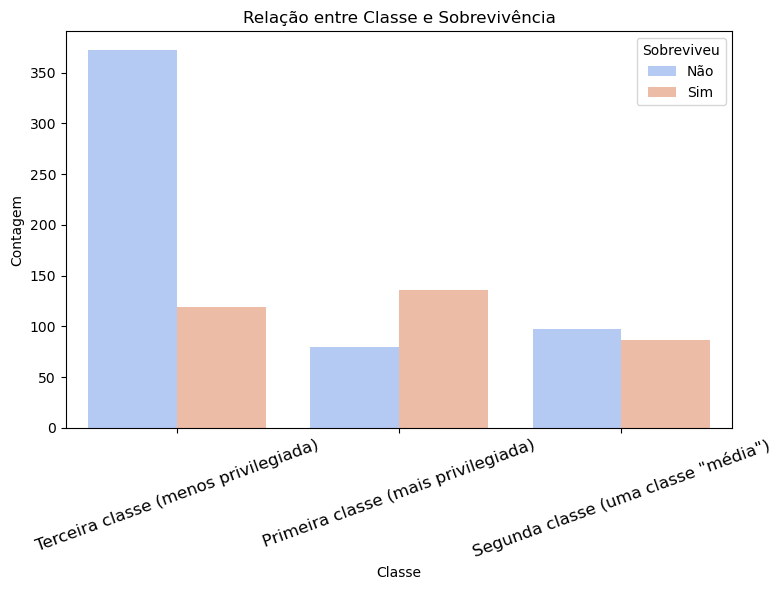

Total de passageiros de cada classe
Classe
Terceira classe (menos privilegiada)    491
Primeira classe (mais privilegiada)     216
Segunda classe (uma classe "média")     184
Name: count, dtype: int64


In [21]:
# transformando as classes
def definir_classe(num_classe):
    if num_classe == 1:
        return "Primeira classe (mais privilegiada)"
    elif num_classe == 2:
        return 'Segunda classe (uma classe "média")'
    elif num_classe == 3:
        return "Terceira classe (menos privilegiada)"

treino['Classe'] = treino['Pclass'].apply(definir_classe)
contagem_classe = treino['Classe'].value_counts()
sobrevivencia_por_classe = treino.groupby('Classe')['Survived'].value_counts()

# criando e configurando o gráfico
plt.figure(figsize= (8, 6))
sns.countplot(data= treino, x= 'Classe', hue= 'Survived', palette= 'coolwarm')

plt.title("Relação entre Classe e Sobrevivência")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.legend(title= 'Sobreviveu', labels=["Não", "Sim"])
plt.xticks(rotation= 20, fontsize= 12)

# exibindo gráfico
plt.tight_layout() 
plt.show()

print("Total de passageiros de cada classe")
print(contagem_classe)

## como observamos, a classe socioecônomica também foi um fator determinante para sobrevivência, sendo a terceira classe a com mais mortos, logo após vem a segunda e depois a primeira com a taxa mais alta de sobreviventes, seria isso uma coincidência? 

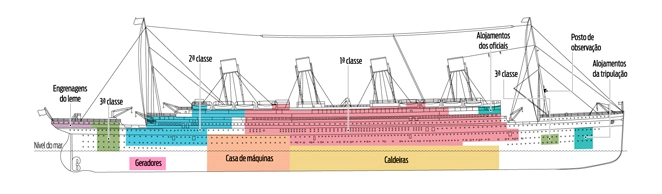

In [23]:
from IPython.display import Image
Image(r"C:\Users\renil\Downloads\divisc3a3o-do-titanic (1).jpg")

### Como podemos observar, esse padrão não se trata de coincidência, pois a primeira classe ficava também mais próxima aos botes salva vidas, em uma posição privilegiada mais acima no navio, além de existirem obstáculos como barreiras (instaladas para lidar com questões de imigração) no caminho das pessoas das outras classes até os botes

# Agora que já obtemos insights interessantes, vamos importar as bibliotecas que usaremos e preparar os dados que serão usados no nosso modelo de Machine Learning

In [26]:
# split de dados 
from sklearn.model_selection import train_test_split
# criação do modelo
from sklearn.tree import DecisionTreeClassifier
# medição de resultados
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# pré processamento de dados
from sklearn.preprocessing import LabelEncoder

Acurácia do modelo no treino: 98.09%


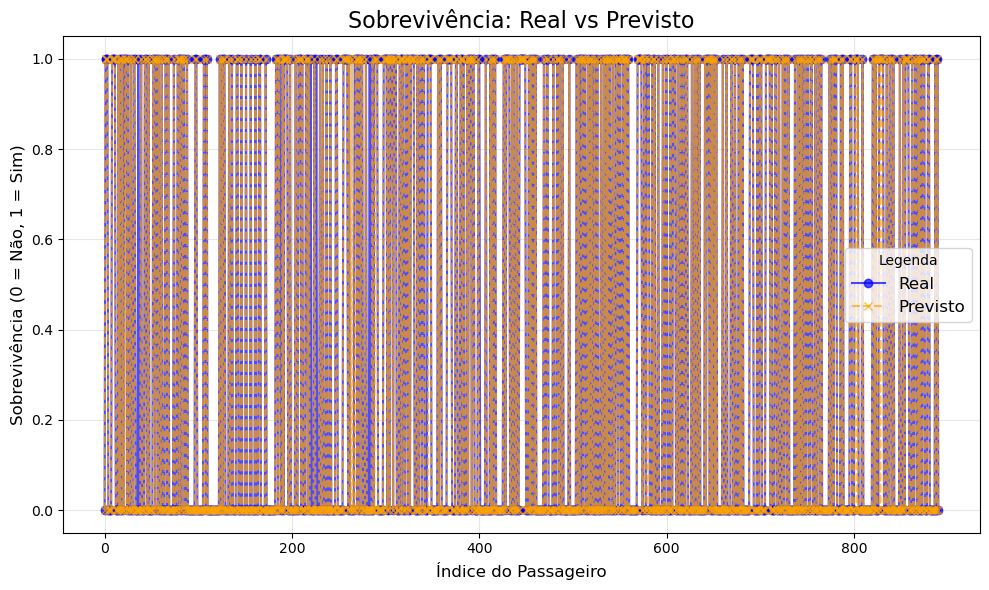

In [82]:
# Preparando os dados
labelencoder = LabelEncoder()
treino['Sex'] = labelencoder.fit_transform(treino['Sex'])  # male=1, female=0
treino['Embarked'] = labelencoder.fit_transform(treino['Embarked']) # referente ao porto de embarque, C=0, Q=1, S=2

# Selecionando variáveis dependentes e independentes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = treino[features]
y = treino['Survived']

# Criando o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X, y)

# Preenchendo valores faltantes no conjunto de teste
teste['Age'] = teste['Age'].fillna(teste['Age'].median())
teste['Fare'] = teste['Fare'].fillna(teste['Fare'].median())
teste['Embarked'] = teste['Embarked'].fillna(teste['Embarked'].mode()[0])

# Codificando variáveis categóricas
teste['Sex'] = labelencoder.fit_transform(teste['Sex'])
teste['Embarked'] = labelencoder.fit_transform(teste['Embarked'])

# Selecionando as mesmas variáveis independentes no conjunto de teste
X_test = teste[features]

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Criando o arquivo de submissão
resultados = pd.DataFrame({
    'PassengerId': teste['PassengerId'],  # IDs de passageiros do conjunto de teste
    'Survived': y_pred                    # Previsões feitas pelo modelo
})

resultados.to_csv('resultados_titanic.csv', index=False)

# Código para avaliar o desempenho do modelo (caso seja usado no treino)
resultados_local = pd.DataFrame({
    'Índice': range(len(y)),
    'Real': y.values,
    'Previsto': modelo.predict(X)
})

plt.figure(figsize=(10, 6))

# Linha para valores reais
plt.plot(resultados_local['Índice'], resultados_local['Real'], label='Real', color='blue', linestyle='-', marker='o', alpha=0.7)

# Linha para valores previstos
plt.plot(resultados_local['Índice'], resultados_local['Previsto'], label='Previsto', color='orange', linestyle='--', marker='x', alpha=0.7)

# Configurando gráfico
plt.title("Sobrevivência: Real vs Previsto", fontsize=16)
plt.xlabel("Índice do Passageiro", fontsize=12)
plt.ylabel("Sobrevivência (0 = Não, 1 = Sim)", fontsize=12)
plt.legend(title="Legenda", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

acuracia = accuracy_score(y, modelo.predict(X))

# Exibindo a acurácia no console
print(f"Acurácia do modelo no treino: {acuracia:.2%}")

plt.show()

# Conclusão 

## Além dos insights gerados o modelo conseguiu 98,09% de precisão.

In [85]:
# criando arquivo CSV para enviar para o Kaggle
resultados = pd.DataFrame({
    'PassengerId': teste['PassengerId'],  
    'Survived': y_pred                    
})


# Exportando para CSV
resultados.to_csv(r"C:\Users\renil\Desktop\TitanicKeagle\ResultadosTitanic.csv", index=False)